
Laboratorio 1: Inversión de Capital
Por: José Leonardo Aceves González

Proposito:
Poder responder la pregunta ¿qué estrategia de inversión propondrías si tu trabajo fuera invertir un millón de pesos?
Caso: Tienes un millón de pesos, tienes dos opciones para invertirlos. Por un lado, puedes hacer una Inversión Pasiva del capital, comprando el 100% del capital de títulos de un ETF que replica al mercado de renta variable mexicano S&P/BMV IPC que es el NAFTRAC. Pero por otro lado, puedes hacer una Inversión Activa del capital, al crear un portafolio que tenga los mismos activos que el ETF y haciendo el rebalanceo por medio de un algoritmo en específico.

Resultados esperados
Para un periodo definido, obtener dos series de tiempo. La primera acerca de la evolución del capital de tu estrategia de inversión pasiva y la segunda, sobre la evolución del capital de tu estrategia de inversión activa. También, una tabla con el histórico de todas las operaciones que se realizan en tu estrategia de inversión activa, y una tabla comparativa con médidas de atribución al desempeño,  para tener una comparación financiera entre ambas opciones de estrategias de inversión.

In [25]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [23]:
#Variables
from data import comision
from data import capital
from data import naftrac
from data import prices
from data import pricesint
from data import pricesret
from data import todropn, todropp
from data import df_activa

In [24]:
#Funciones definidas
from functions import rand_weights
from functions import random_portfolio
from functions import summary_portfolios
from functions import best_portfolio

[Text(0.5, 1.0, 'Prices returns')]

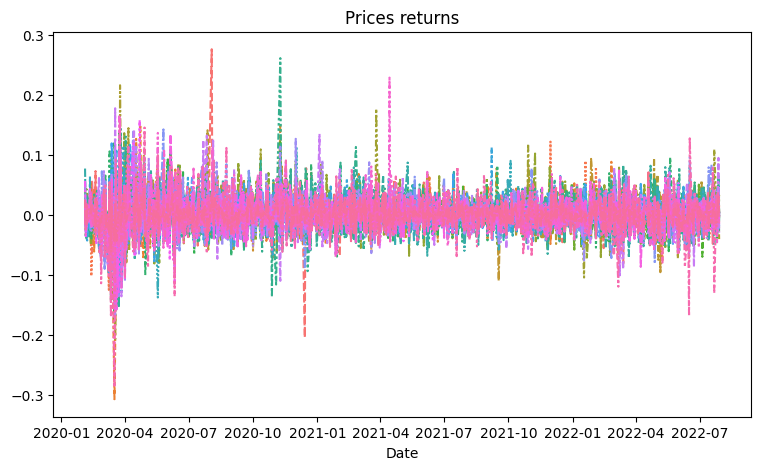

In [19]:
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=prices.pct_change().dropna(), legend=False).set(title='Prices returns')

[Text(0.5, 1.0, 'Returns correlation')]

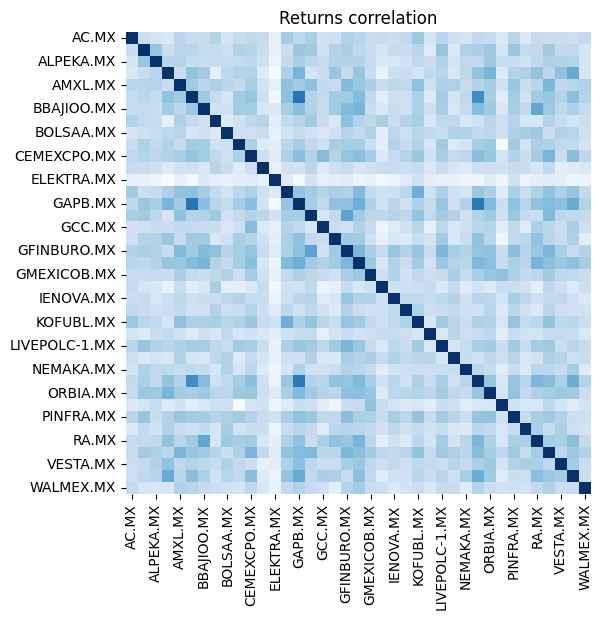

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(data=prices.pct_change().dropna().apply(lambda x: np.log(1+x)).corr(), cbar=False, cmap='Blues').set(title='Returns correlation')

Consideraciones espaciales para inversión activa:
1. Utiliza los activos para los cuales tienes su precio para todo el periodo 31-01-2020/29-07-2022
2. Utiliza como base sólo los activos incluidos en la ponderación inicial del NAFTRAC en el 31-01-2020
3. Cuando elimines activos por no contar con precios para todo el periodo necesario, contabiliza 
   en CASH el capital que hayan tenido asignado por su ponderación en NAFTRAC.
4. Construye un portafolio eficiente, maximizando el sharpe estándar, empezando desde 
   el  31-01-2021 y utilizando los rendimientos logartimicos diarios hasta el 31-01-2020
5. A partir del siguiente mes inmediato al 29-02-2021, rebalancea, con los precios diarios, 
   utilizando la siguiente regla:
   a. Disminuir en un 2.5% la posición en títulos de aquellos activos cuyo precio disminuyó > 5%
   b. Aumentar en un 2.5% la posición en títulos de aquellos activos cuyo precio aumentó un > 5%
   c. Considera pagar las mismas comisiones por rebalanceo para cada cambio de posición 
      con cada activo según aplique


In [21]:
weights = pd.DataFrame(columns=['Means', 'StanDev', 'SharpeR', 'AC.MX', 'ALFAA.MX', 'ALPEKA.MX',
       'ALSEA.MX', 'AMXL.MX', 'ASURB.MX', 'BBAJIOO.MX', 'BIMBOA.MX',
       'BOLSAA.MX', 'BSMXB.MX', 'CEMEXCPO.MX', 'CUERVO.MX', 'ELEKTRA.MX',
       'FEMSAUBD.MX', 'GAPB.MX', 'GCARSOA1.MX', 'GCC.MX', 'GENTERA.MX',
       'GFINBURO.MX', 'GFNORTEO.MX', 'GMEXICOB.MX', 'GRUMAB.MX',
       'IENOVA.MX', 'KIMBERA.MX', 'KOFUBL.MX', 'LABB.MX', 'LIVEPOLC-1.MX',
       'MEGACPO.MX', 'NEMAKA.MX', 'OMAB.MX', 'ORBIA.MX', 'PE&OLES.MX',
       'PINFRA.MX', 'Q.MX', 'RA.MX', 'TLEVISACPO.MX', 'VESTA.MX',
       'VOLARA.MX', 'WALMEX.MX'], index=naftrac.index[12:31].tolist())

for i in range(12,31):
    '''
    Aquí estoy sacando portafolios eficientes sobre todos los meses entre 01/2022 y 07/2022.
    '''
    portfolio = summary_portfolios(5000, pricesret.iloc[:12])
    weights.iloc[i-12] = best_portfolio(portfolio).iloc[0]
    
weights = weights.iloc[:,3:]

for i in range(len(pricesret.iloc[:12])):
    for j in range(len(pricesret.columns)):
        change = pricesret.iloc[i+1,j]/pricesret.iloc[i,j]-1
        if change > .05:
            weights.iloc[i+1,j] = weights.iloc[i+1,j]*(1+.035)
        elif change < -.05:
            weights.iloc[i+1,j] = weights.iloc[i+1,j]*(1)

weights = ((weights*capital)/pricesint.iloc[12:31]).astype('int')
weights = weights*pricesint.iloc[12:31]
weights = weights.sum(axis=1)

In [22]:
df_activa['Capital'] = round(weights,2)
df_activa['Rend'] = round(weights.pct_change().fillna(0),4)
df_activa['Rend_acum'] = round(weights.pct_change().fillna(0),4).cumsum()
df_activa

,Capital,Rend,Rend_acum
2021-01-29,998121.36,0.0000,0.000000e+00
2021-02-26,1021103.40,0.0230,2.300000e-02
2021-03-31,999562.42,-0.0211,1.900000e-03
2021-04-30,1004293.84,0.0047,6.600000e-03
2021-05-31,1004098.34,-0.0002,6.400000e-03
2021-06-30,1001905.50,-0.0022,4.200000e-03
2021-07-30,1005172.33,0.0033,7.500000e-03
2021-08-31,1006806.08,0.0016,9.100000e-03
2021-09-30,1009153.63,0.0023,1.140000e-02
2021-10-26,1013093.89,0.0039,1.530000e-02


<AxesSubplot:ylabel='Count'>

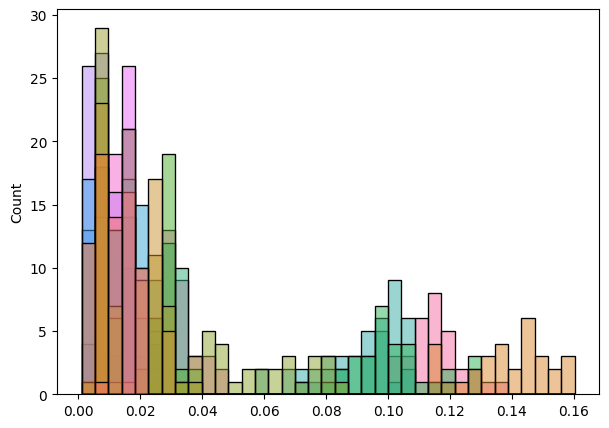

In [26]:
'''
INVERSIÓN PASIVA
1. Se consideran las comisiones a pagar por cada rebalanceo = 0.00125 del valor de la operación 
   definido como: títulos*precio*comisión.
5. Forma un portafolio con las ponderaciones del primer mes y calcula sus comisiones, para los siguientes 
   periodos no harás rebalanceo pero si debes de utilizar los precios de cada mes para recalcular 
   el valor del portafolio cada mes.
5. El porcentaje de capital indicado para KOFL.MX, KOFUBL.MX, USD.MXN, BSMXB.MX, NMKA.MX  lo vamos 
   a eliminar de las posiciones históricas y considerar como CASH.
6. Para calcular el valor de la posición mensual utiliza los precios descargados de  yfinance para 
   el rebalanceo de cada mes.
'''
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(naftrac.loc[:, (naftrac != 0).all(axis=0)].values, legend=False)

In [27]:
naftrac = naftrac.replace(0, np.nan).dropna(axis=1)
naftracprices = prices.loc[prices.index.intersection(naftrac.index)]
naftracprices = naftracprices.drop(todropp, axis=1)
naftrac = naftrac.drop(todropn, axis=1)
capital = round(naftrac*capital/naftracprices,0)*naftracprices
capital = capital.sum(axis = 1)
df_pasiva = pd.DataFrame()
df_pasiva['Capital'] = round(capital,2)
df_pasiva['Rend'] = round(capital.pct_change().fillna(0),4)
df_pasiva['Rend_acum'] = round(capital.pct_change().fillna(0),4).cumsum()
df_pasiva.head(10)

,Capital,Rend,Rend_acum
Fecha,,,
2020-01-31,953797.20,0.0000,0.0000
2020-02-28,952012.84,-0.0019,-0.0019
2020-03-31,958867.08,0.0072,0.0053
2020-04-30,954818.05,-0.0042,0.0011
2020-05-29,955554.39,0.0008,0.0019
2020-06-30,954475.48,-0.0011,0.0008
2020-07-31,958055.84,0.0038,0.0046
2020-08-31,957235.11,-0.0009,0.0037
2020-09-30,949350.38,-0.0082,-0.0045


<AxesSubplot:title={'center':'Estrategia de Inversión Pasiva'}, xlabel='Fecha', ylabel='Rend'>

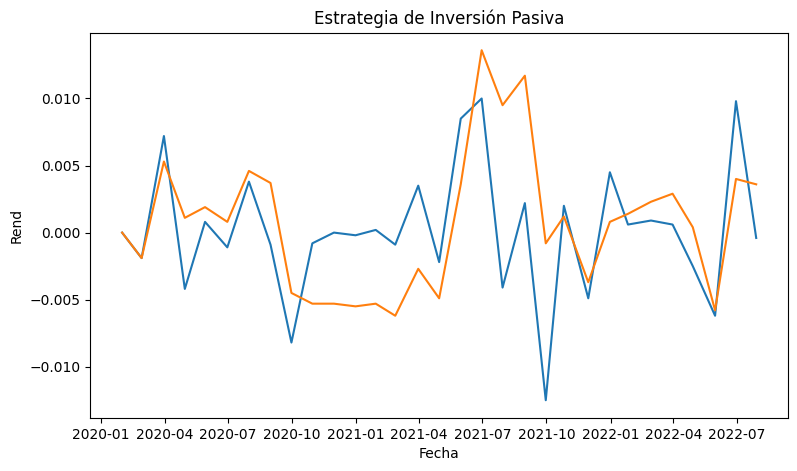

In [28]:
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=df_pasiva['Rend']).set(title='Estrategia de Inversión Pasiva')
sns.lineplot(data=df_pasiva['Rend_acum'])

CONCLUSIONES PASIVA VS ACTIVA:
Durante el laboratorio número 1, encontré que la manera más optima de llegar a un mayor rendimiento es atraves de un constante rebalanceo de los pesos de los activos. Creo que el seguir una inversión pasiva es una manera facil de inverstir si tienes un conocimiento bajo/nulo acerca de mercados bursatiles. 
Me parece que en este caso particular, la invesión activa es mejor aunque abría que definifir una correcta metodologia en cuanto a tiempos de rebalanceo y pesos de recompra. 12/09/2022